# Weather models : 2D parameters

The aim of this notebook is to indicate how to read the 2D data from weather models.
There are 2 weather models:
* a fine-mesh french weather model called 'AROME' (spatial resolution of 0.025°)
* a large-mesh french weather model called 'ARPEGE' (spatial resolution of 0.1°)

Per model and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step is 1h.

Here are the different weather parameters:

* at 2m: temperature (in K), dew point temperature** (in K) and relative humidity (in %)
* at 10m: wind speed (in m.s<sup>-1</sup>), wind direction (in degrees), U and V wind components*** (in m.s<sup>-1</sup>)
* at the sea level: mean sea level pressure (in Pa)
* at the ground level: total precipitation (in kg m<sup>-2</sup> which is equivalent to mm) **since the beginning of the model run**

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/weather-models/).

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

*** : horizontal wind speed components, U : from west to east and V : from south to north. 

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**).</font>

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
model = 'arome'  #weather model (arome or arpege)
param = "tp"   #parameter name in the file (cf cells below to know the parameter names -> exploration of metadata)
file_date = dt.datetime(2017, 2, 14) # Day example 

In [3]:
fname = "/kaggle/input/defi-ia-2022-test/Train/Train/X_forecast/2D_%s_%s.nc" %(model,file_date.strftime('%Y%m%d'))
data = xr.open_dataset(fname)

In [4]:
data

<xarray.Dataset>
Dimensions:     (latitude: 227, longitude: 315, valid_time: 25, Id: 25)
Coordinates:
    time        datetime64[ns] ...
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
  * Id          (Id) object '409_0' '409_1' '409_2' ... '409_23' '409_24'
Data variables:
    ws          (valid_time, latitude, longitude) float32 ...
    p3031       (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    d2m         (valid_time, latitude, longitude) float32 ...
    r           (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-09-30T18:02:47 GRIB to CDM+CF via cfgrib-0....

In [5]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008], dtype=float32)
Coordinates:
    time       datetime64[ns] 2017-02-14
  * longitude  (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008

In [6]:
data[coord].values[0:10]

array([-5.842, -5.817, -5.792, -5.767, -5.742, -5.717, -5.692, -5.667,
       -5.642, -5.617], dtype=float32)

In [7]:
run_date = data['time']
#run_date.values     #get the values
run_date

<xarray.DataArray 'time' ()>
array('2017-02-14T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2017-02-14
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [8]:
range_forecasts_dates = data['valid_time']
range_forecasts_dates

<xarray.DataArray 'valid_time' (valid_time: 25)>
array(['2017-02-14T00:00:00.000000000', '2017-02-14T01:00:00.000000000',
       '2017-02-14T02:00:00.000000000', '2017-02-14T03:00:00.000000000',
       '2017-02-14T04:00:00.000000000', '2017-02-14T05:00:00.000000000',
       '2017-02-14T06:00:00.000000000', '2017-02-14T07:00:00.000000000',
       '2017-02-14T08:00:00.000000000', '2017-02-14T09:00:00.000000000',
       '2017-02-14T10:00:00.000000000', '2017-02-14T11:00:00.000000000',
       '2017-02-14T12:00:00.000000000', '2017-02-14T13:00:00.000000000',
       '2017-02-14T14:00:00.000000000', '2017-02-14T15:00:00.000000000',
       '2017-02-14T16:00:00.000000000', '2017-02-14T17:00:00.000000000',
       '2017-02-14T18:00:00.000000000', '2017-02-14T19:00:00.000000000',
       '2017-02-14T20:00:00.000000000', '2017-02-14T21:00:00.000000000',
       '2017-02-14T22:00:00.000000000', '2017-02-14T23:00:00.000000000',
       '2017-02-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    time        datetime64[ns] 2017-02-14
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
Attributes:
    standard_name:  time
    long_name:      time

In [9]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 'tp' (valid_time: 25, latitude: 227, longitude: 315)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.      , 0.      , ..., 0.      , 0.      ],
        [0.      , 0.      , ..., 0.      , 0.      ],
        ...,
        [0.      , 0.      , ..., 1.701402, 1.816074],
        [0.      , 0.      , ..., 1.728984, 1.736585]],

       ...,

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [1.564795, 1.735934, ..., 4.642478, 4.875079],
        [1.932266, 2.003936, ..., 4.721749, 4.645953]],

       [[1.488129, 1.477705, ..., 0.013465, 0.014334],
        [1.708569, 1.70314 , ..., 0.016289, 0.014986],
        ...,
        [4.020469, 4.513689, ..., 4.642478, 4.875079],
        [4.687   , 4.672666, ..., 4.721749, 4.645953]]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2017-02-14
  * latitude    (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude   (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * valid_time  (valid_time) datetime64[ns] 2017-02-14 ... 2017-02-15
Attributes:
    long_name:  Total Precipitation
    units:      kg m**-2

The structure of the parameter (3 dimensions):
* number of steps or range forecasts
* number of points in latitude
* number of points in longitude  

In [10]:
d_vals.shape

(25, 227, 315)

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [12]:
forecast_date = dt.datetime(2017, 2, 14,12,0)

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


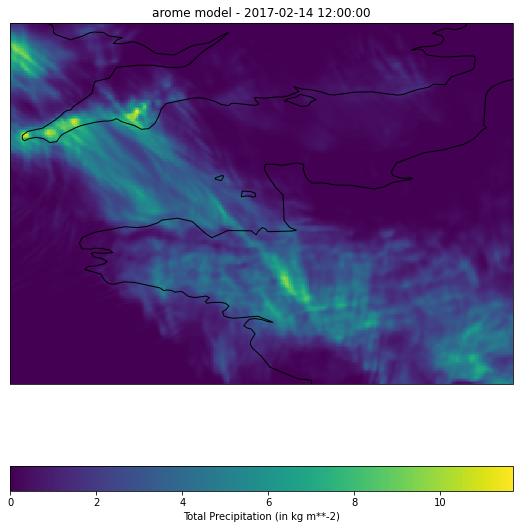

In [13]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig=plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data and the background map (coastlines and borders)
img = ax.imshow(data.sel(valid_time=forecast_date)[param], interpolation='none', origin='upper', extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))


plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title(model +" model - "+str(forecast_date))
plt.show()